In [1]:
%pylab inline
from pygadgetreader import *
from numpy import linalg
from octopus import orbit_cm, profiles
from astropy import units as u
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
G = constants.G
G = G.to('u.kpc * u.km**2 / (u.s**2 * u.Msun)')
print G

4.30211348837e-06 km2 kpc / (s2 solMass)


In [53]:
def kinetic_e(vxyz, M, vx_cm, vy_cm, vz_cm):
    V_t = np.sqrt((vxyz[:,0]-vx_cm)**2.0 + (vxyz[:,1]-vy_cm)**2.0 + (vxyz[:,2]-vz_cm)**2.0)
    U = 0.5 * M * V_t**2.0
    return sum(U)

In [58]:
def mw_particles(xyz, vxyz, ids, N_halo=1000000):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    index_lmc = np.where(ids>=id_cut)[0]
    return xyz[index_mw], vxyz[index_mw]

In [39]:
all_pos_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
all_vel_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
all_pid_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')
all_M_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'mass', 'dm')
all_pot_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pot', 'dm')

all_pos_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_149.hdf5', 'pos', 'dm')
all_vel_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_149.hdf5', 'vel', 'dm')
all_pid_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_149.hdf5', 'pid', 'dm')
all_M_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_149.hdf5', 'mass', 'dm')
all_pot_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_149.hdf5', 'pot', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Mass
Returning DM    Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Mass
Returning DM    Potential


In [60]:
E = np.zeros(150)
for i in range(150):
    all_vel = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'vel', 'dm')
    all_pos = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'pos', 'dm')
    all_M = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'mass', 'dm')
    all_pot = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'pot', 'dm')
    all_ids = readsnap(('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_{:0>3d}.hdf5').format(i), 'pid', 'dm')
    MW_pos, MW_vel = mw_particles(all_pos, all_vel, all_ids)
    xcm, ycm, zcm, vx, vy, vz = orbit_cm.CM(MW_pos, MW_vel)
    U = sum(all_pot)*G
    T = kinetic_e(all_vel, all_M, vx, vy, vz)
    E[i] = 2.0*T/U.value

Returning DM    Velocities
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs
Returning DM    Velocities
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs
Returning DM    Velocities
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs
Returning DM    Velocities
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs
Returning DM    Velocities
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs
Returning DM    Velocities
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs
Returning DM    Velocities
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs
Returning DM    Velocities
Returning DM    Positions
Returning DM    Mass
Returning DM    Potenti

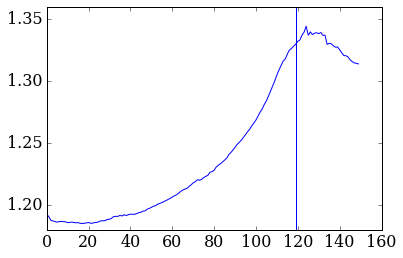

In [61]:
plot(np.abs(E)/10.)
axvline(119)

In [36]:
print T_f

3.65088e+06


In [37]:
2.0*T_i/U_i

<Quantity -19.811529731300872 s2 solMass / (km2 kpc)>

In [38]:
2.0*T_f/U_f

<Quantity -12.853219900290902 s2 solMass / (km2 kpc)>

In [42]:
2.0*T_f/U_f

<Quantity -17.439121878386015 s2 solMass / (km2 kpc)>